In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.groupby(['Genre']).mean()[["Annual Income (k$)", "Spending Score (1-100)"]]

,Annual Income (k$),Spending Score (1-100)
Genre,,
Female,59.250000,51.526786
Male,62.227273,48.511364


In [6]:
df[df['Genre'] == 'Female']

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
...,...,...,...,...,...
191,192,Female,32,103,69
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79


In [7]:
df.iloc[:, [3,4]].columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [8]:
df.iloc[:, [3,4]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
X = df.iloc[:, [3,4]].values

In [10]:
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

In [11]:
type(X)

numpy.ndarray

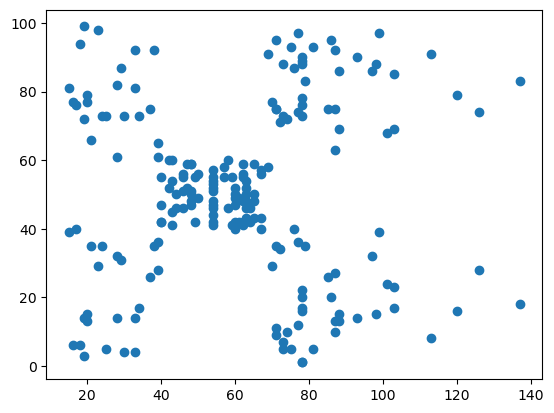

In [12]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [13]:
X1 = df.iloc[:,[3,4]]
X1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [14]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

In [15]:
hopkins(X1)

0.7894154271572372

In [28]:
l = []
for i in range(1000):
    l.append(hopkins(X1))
sum(l)/len(l)

0.7600655540540467

In [29]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

kmeans.cluster_centers_

array([[37.28888889, 50.28888889],
       [79.6       , 50.12727273]])

In [31]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

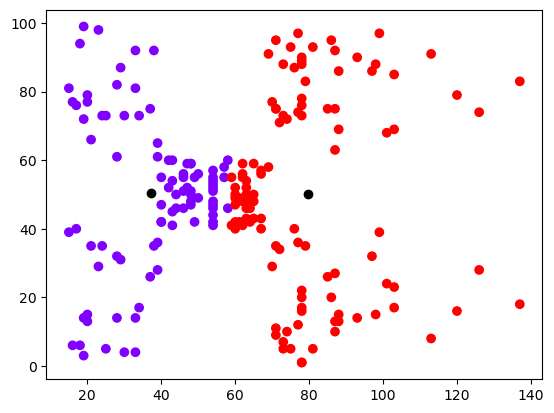

In [32]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

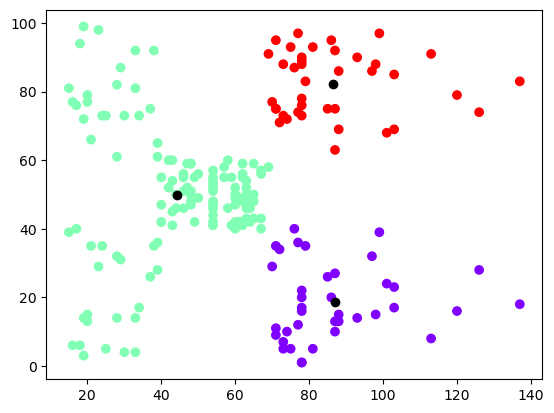

In [33]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

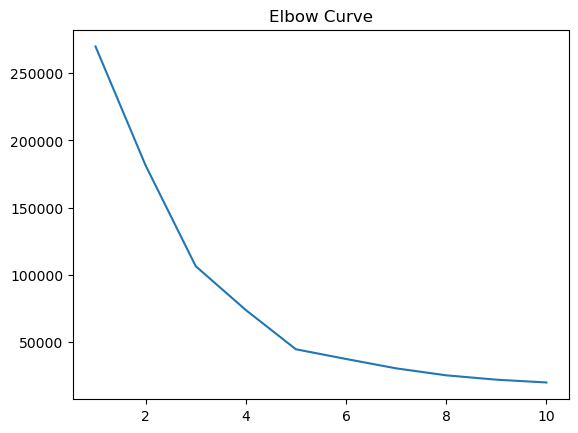

In [34]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Curve")
plt.show()

In [35]:
from sklearn.metrics import silhouette_score
sse_ = [ ]
for k in range(2,15):
    kmeans=KMeans(n_clusters=k).fit(X)
    sse_.append([k,silhouette_score(X,kmeans.labels_)])

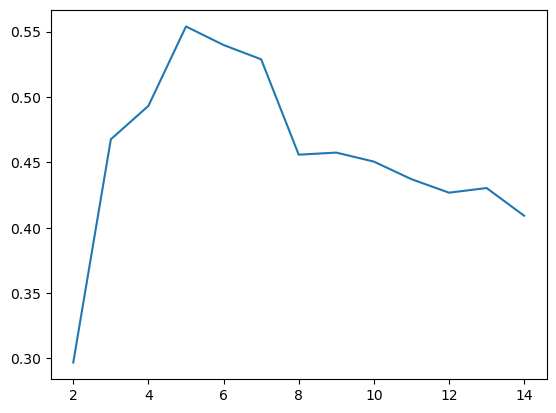

In [36]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

In [37]:
sse_

[[2, 0.2968969162503008],
 [3, 0.46761358158775435],
 [4, 0.4931963109249047],
 [5, 0.553931997444648],
 [6, 0.53976103063432],
 [7, 0.5288104473798049],
 [8, 0.4558493609925033],
 [9, 0.457462901394195],
 [10, 0.45056557470336733],
 [11, 0.437104484577306],
 [12, 0.4267928147986293],
 [13, 0.4303449223857387],
 [14, 0.4091405053248309]]

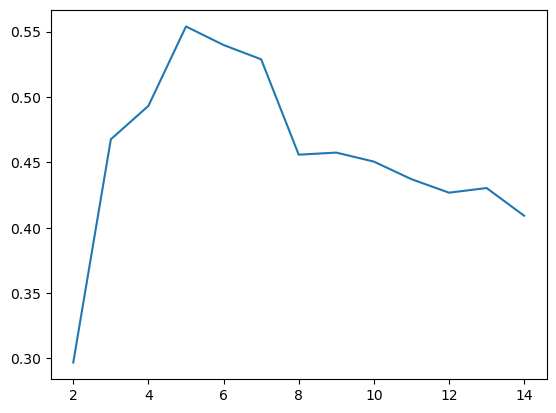

In [38]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

Text(0, 0.5, 'Spending Score (1-100)')

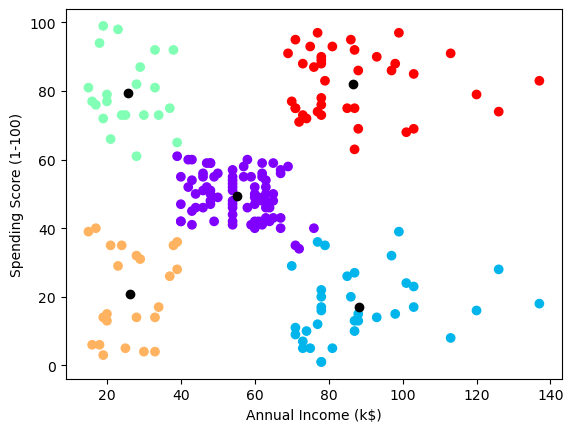

In [39]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')